# 1) Import Machine Learning Packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/jiwant/Bbackup/PCA_Project/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# 2) Extract Training Set and Test Set with Data Preprocessing

In [2]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

Y_train = train['label'].values.astype('int32')
Y_train = np_utils.to_categorical(Y_train) 
train.drop(['label'], axis=1, inplace=True)

X_train = (train.values).astype('float32')
X_test = (test.values).astype('float32')

# 3) Reshape and Print First Character

Y_train value form: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Which is 0 (1 in [0] position of the vector).


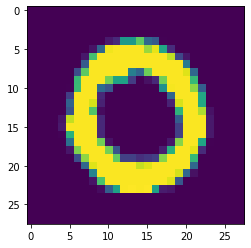

In [3]:
print('Y_train value form: {}'.format(Y_train[1]))
print('Which is 0 (1 in [0] position of the vector).')
plt.imshow(X_train[1].reshape(28,28))
plt.show()

# 4) Standardize All Data

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

# 5) Variance vs Number of Dimensions Plot

Text(0, 0.5, 'Cumulative explained variance')

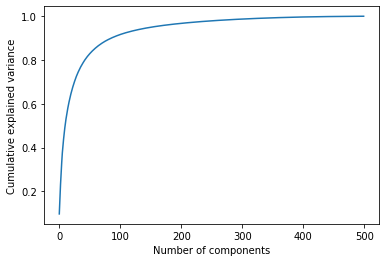

In [5]:
pca = PCA(n_components=500)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# 6) Performing PCA with target Dimensional Reduction set to 100

In [6]:
NCOMPONENTS = 100

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)

(42000, 784)
(42000, 100)


# 7) Inverting PCA Decomposition

In [7]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

# 8) Plotting 100D Decompose Image from and Printing it Side by Side

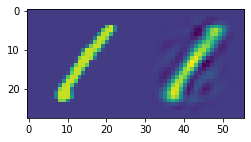

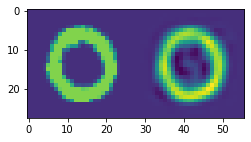

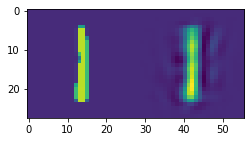

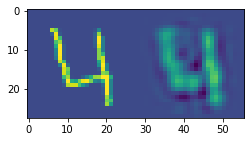

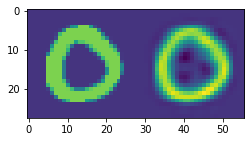

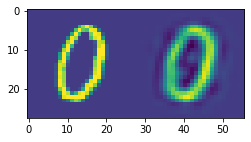

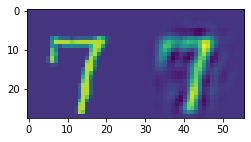

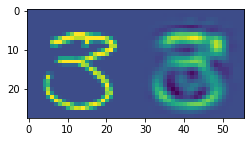

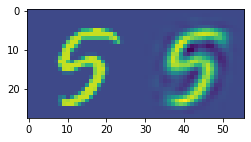

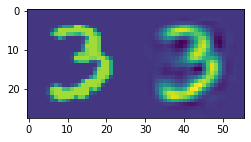

In [8]:
def side_by_side(indexes):
    org = X_train[indexes].reshape(28,28)
    rec = inv_sc[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,10):
    side_by_side(index)

# 9) Train Model using simple Perceptron and Fit the Training Data

In [9]:
model = Sequential()
layers = 1
units = 128

model.add(Dense(units, input_dim=NCOMPONENTS, activation='relu'))
model.add(GaussianNoise(pca_std))
for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(GaussianNoise(pca_std))
    model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

model.fit(X_pca_train, Y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2)

Epoch 1/100
140/140 - 1s - loss: 2.5481 - categorical_accuracy: 0.4808 - val_loss: 0.4045 - val_categorical_accuracy: 0.8897
Epoch 2/100
140/140 - 1s - loss: 0.8554 - categorical_accuracy: 0.7839 - val_loss: 0.3206 - val_categorical_accuracy: 0.9119
Epoch 3/100
140/140 - 1s - loss: 0.5582 - categorical_accuracy: 0.8427 - val_loss: 0.2673 - val_categorical_accuracy: 0.9238
Epoch 4/100
140/140 - 1s - loss: 0.4107 - categorical_accuracy: 0.8769 - val_loss: 0.2235 - val_categorical_accuracy: 0.9351
Epoch 5/100
140/140 - 1s - loss: 0.3465 - categorical_accuracy: 0.8952 - val_loss: 0.2036 - val_categorical_accuracy: 0.9383
Epoch 6/100
140/140 - 1s - loss: 0.2973 - categorical_accuracy: 0.9083 - val_loss: 0.1799 - val_categorical_accuracy: 0.9448
Epoch 7/100
140/140 - 1s - loss: 0.2659 - categorical_accuracy: 0.9176 - val_loss: 0.1737 - val_categorical_accuracy: 0.9487
Epoch 8/100
140/140 - 1s - loss: 0.2418 - categorical_accuracy: 0.9236 - val_loss: 0.1595 - val_categorical_accuracy: 0.9516


140/140 - 1s - loss: 0.0428 - categorical_accuracy: 0.9859 - val_loss: 0.1122 - val_categorical_accuracy: 0.9757
Epoch 67/100
140/140 - 1s - loss: 0.0460 - categorical_accuracy: 0.9841 - val_loss: 0.1120 - val_categorical_accuracy: 0.9751
Epoch 68/100
140/140 - 1s - loss: 0.0460 - categorical_accuracy: 0.9853 - val_loss: 0.1155 - val_categorical_accuracy: 0.9732
Epoch 69/100
140/140 - 1s - loss: 0.0438 - categorical_accuracy: 0.9846 - val_loss: 0.1156 - val_categorical_accuracy: 0.9743
Epoch 70/100
140/140 - 1s - loss: 0.0408 - categorical_accuracy: 0.9864 - val_loss: 0.1158 - val_categorical_accuracy: 0.9759
Epoch 71/100
140/140 - 1s - loss: 0.0402 - categorical_accuracy: 0.9869 - val_loss: 0.1231 - val_categorical_accuracy: 0.9732
Epoch 72/100
140/140 - 1s - loss: 0.0412 - categorical_accuracy: 0.9856 - val_loss: 0.1158 - val_categorical_accuracy: 0.9751
Epoch 73/100
140/140 - 1s - loss: 0.0396 - categorical_accuracy: 0.9867 - val_loss: 0.1139 - val_categorical_accuracy: 0.9762
Epoch

In [10]:
predictions = model.predict_classes(X_pca_test, verbose=0)

def write_predictions(predictions, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions}).to_csv(fname, index=False, header=True)

write_predictions(predictions, "pca-keras-mlp.csv")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


# 10) Analyze Predictions

In [11]:
predictions = pd.read_csv('./pca-keras-mlp.csv')

In [12]:
predictions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
